In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Форма распределения

Рассмотрим непрерывную случайную величину $x$, имеющую плотность распределения в виде $$f\left(x\right) = \frac{1}{a}e^{-\frac{x}{a}}$$ на интервале $\left[0; +\infty\right)$. В физике такую функцию плотности распределения называют просто распределением Больцмана. Математическое ожидание и дисперсия введённой случайной величины даются выражениями $\mathbb{E}(x) = a$, $ \mathbb{D}(x) = a^2 $. В дальнейшем положим $a = 1$. Такое распределение также называют экспоненциальным: https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B. В наших обозначениях параметр распределения $\lambda$ из википедии переписывается в форме $\lambda = 1 / a$.

# Построение выборки из распределения и сравнение с теоретической плотностью

Введём распределение заданной формы, не входящее в список стандартных. На самом деле, оно имеется в библиотеке стандартных распределений: $sts.expon$. Тем не менее, попробуем ввести его самостоятельно. Затем сгенерируем из него 1000 чисел. 

In [5]:
a = 1.0
#определим своё распределение, см. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous
class Boltzmann(sts.rv_continuous):
    def _pdf(self, x):
        return np.exp(- x / a) / a  

bol = Boltzmann(a=0, name='Boltzmann')
rand_val = bol.rvs(size = 1000)
x = np.linspace(0, 25, 200)
y = np.exp(- x / a) / a  


Построим теоретический и полученный программно графики.

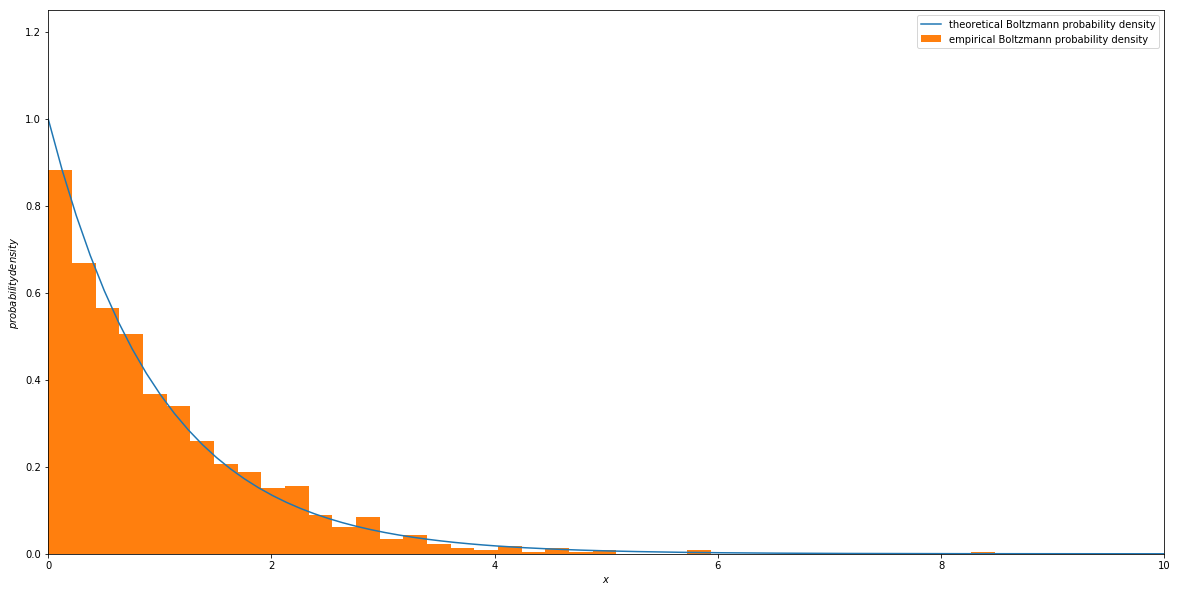

In [6]:
plt.figure(figsize=(20, 10))
plt.axis([0, 10, 0, 1.25 / a])
plt.plot(x, y, label='theoretical Boltzmann probability density')
plt.hist(rand_val, bins = 40, label='empirical Boltzmann probability density', normed=True)
plt.ylabel('$probability density$')
plt.xlabel('$x$')
plt.legend()

Видно, что распределение является "скошенным" и значительно отличается по форме от нормального.

# Применение центральной предельной теоремы

Сгенерируем четыре массива из 1000 чисел, каждое из которых является выборочным средним из соответственно 5, 10, 50 и 250 элементов.

In [11]:
n = [5.0, 10.0, 50.0, 250.0]
row1 = []
row2 = []
row3 = []
row4 = []
np.sum(bol.rvs(size = int(n[0])))
for count in range(100):
    row1 += [np.sum(bol.rvs(size = int(n[0]))) / n[0]]
    row2 += [np.sum(bol.rvs(size = int(n[1]))) / n[1]]
    row3 += [np.sum(bol.rvs(size = int(n[2]))) / n[2]]
    row4 += [np.sum(bol.rvs(size = int(n[3]))) / n[3]]


Построим гистограммы выборочных средних для выборки из $n$ элементов, а также сравним с соответствующими нормальными распределениями с математическими ожиданиями $a$ и дисперсиями $\frac{a^2}{n}$. Согласно центральной предельной теореме в пределе больших $n$ гистограмма и плотность нормального распределения должны совпасть. Первым будет график с $n = 5$. 

Построим перед этим четыре нормальных распределения с соответствующими $n$.

In [12]:
norm_rv1 = sts.norm(loc=a, scale=a / (n[0] ** 0.5))
norm_rv2 = sts.norm(loc=a, scale=a / (n[1] ** 0.5))
norm_rv3 = sts.norm(loc=a, scale=a / (n[2] ** 0.5))
norm_rv4 = sts.norm(loc=a, scale=a / (n[3] ** 0.5))
x_rows = np.linspace(0, 5, 1000)

C:\Users\orepnikov\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:817: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bins


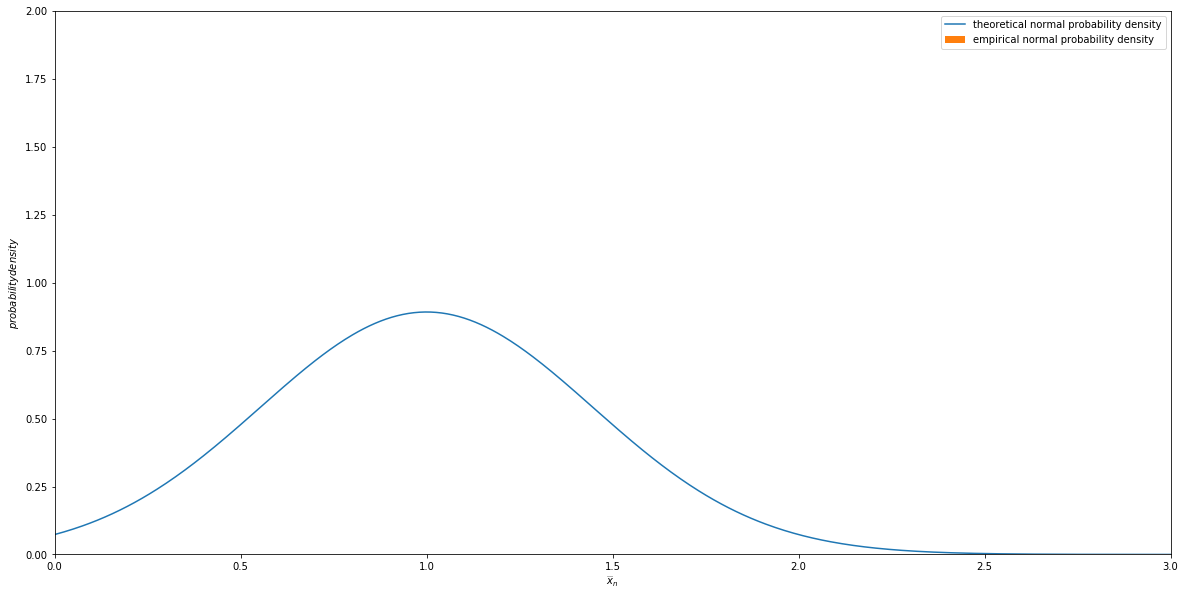

In [10]:
plt.figure(figsize=(20, 10))
plt.axis([0, 3, 0, 2])
plt.plot(x_rows, norm_rv1.pdf(x_rows), label='theoretical normal probability density')
plt.hist(row1, bins = 40, normed=True, label='empirical normal probability density')
plt.ylabel('$probability density$')
plt.xlabel('$\widebar{x}_n$')
plt.legend()

Аналогично построим график для $n = 10$:

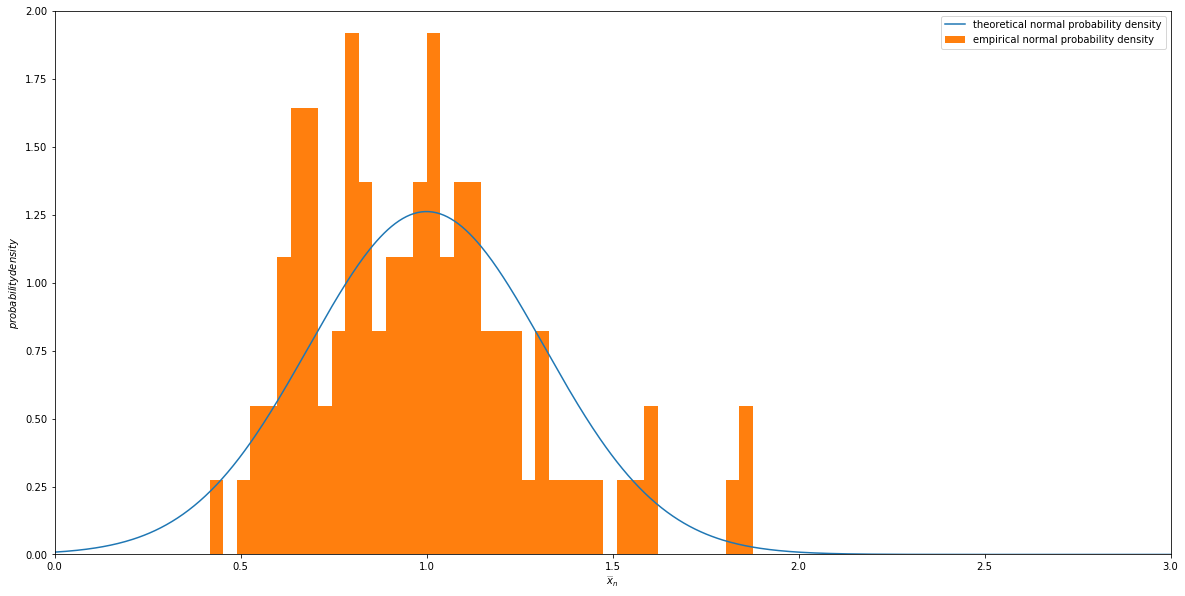

In [13]:
plt.figure(figsize=(20, 10))
plt.axis([0, 3, 0, 2])
plt.plot(x_rows, norm_rv2.pdf(x_rows), label='theoretical normal probability density')
plt.hist(row2, bins = 40, normed=True, label='empirical normal probability density')
plt.ylabel('$probability density$')
plt.xlabel('$\widebar{x}_n$')
plt.legend()

График для $n = 50$:

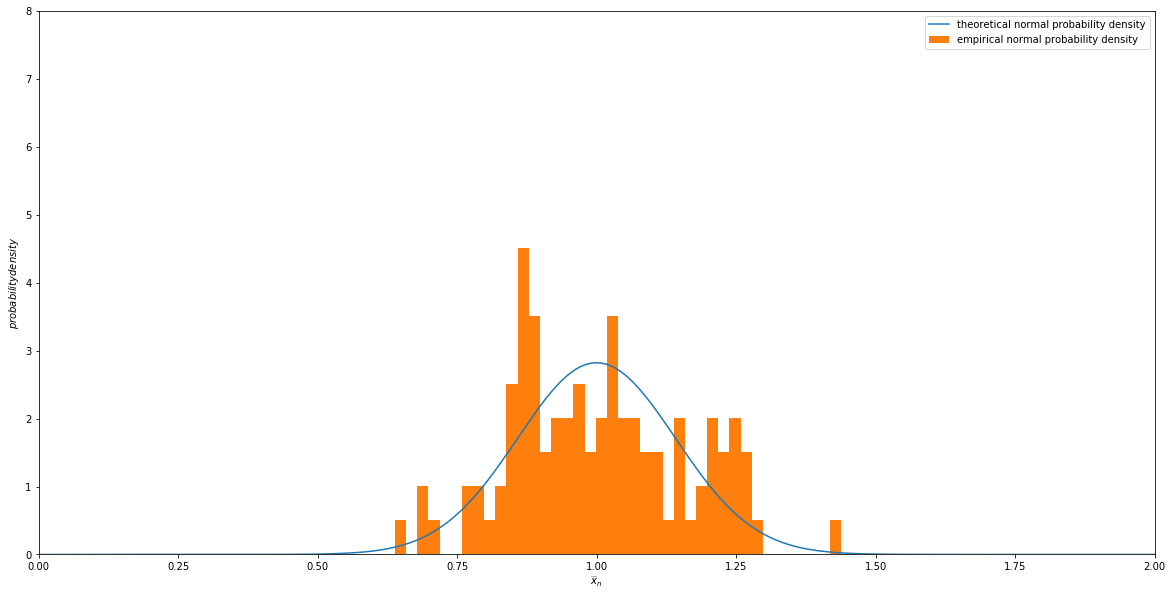

In [14]:
plt.figure(figsize=(20, 10))
plt.axis([0, 2, 0, 8])
plt.plot(x_rows, norm_rv3.pdf(x_rows), label='theoretical normal probability density')
plt.hist(row3, bins = 40, normed=True, label='empirical normal probability density')
plt.ylabel('$probability density$')
plt.xlabel('$\widebar{x}_n$')
plt.legend()

График для $n = 250$:

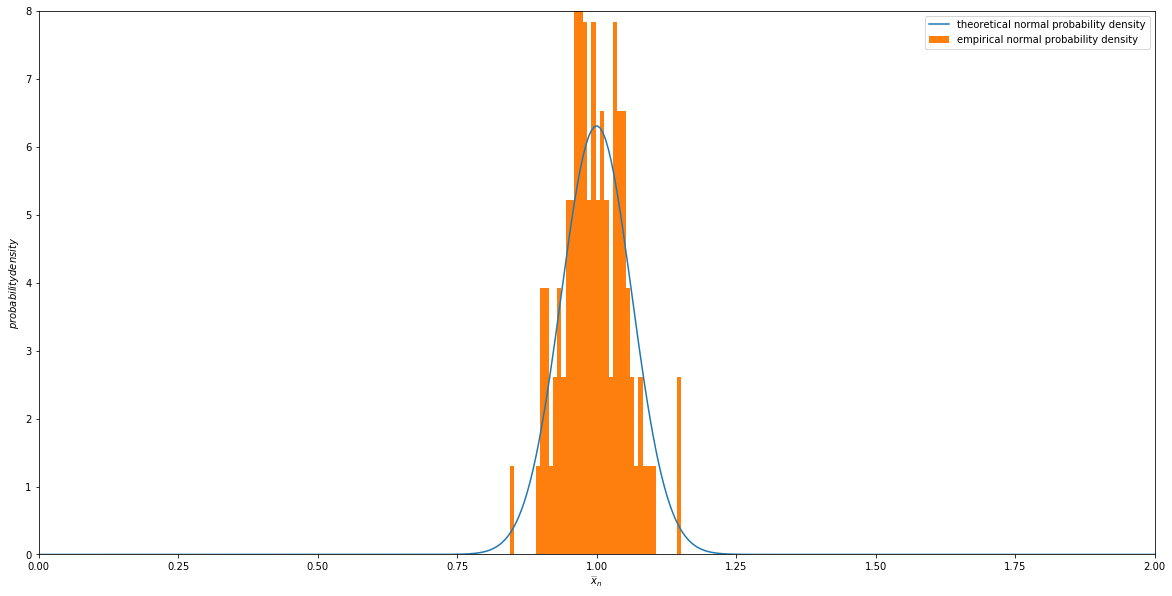

In [15]:
plt.figure(figsize=(20, 10))
plt.axis([0, 2, 0, 8])
plt.plot(x_rows, norm_rv4.pdf(x_rows), label='theoretical normal probability density')
plt.hist(row4, bins = 40, normed=True, label='empirical normal probability density')
plt.ylabel('$probability density$')
plt.xlabel('$\widebar{x}_n$')
plt.legend()

# Вывод:

По результатам задания видно, что выборочное среднее действительно стремится к нормальному распределению с соответствующими  согласно центральной предельной теореме параметрами. Ясно, что при увеличении выборки дисперсия нормального распределения уменьшается, а точность, с которой оно приближается к полученной эмпирически выборке растёт. Так как плотность вероятности нашего начального распределения имеет максимум в нуле, то для хорошей аппроксимации выборочного среднего нормальным распределением требуется довольно большой размер выборки.